In [175]:
'''day 5'''
import numpy as np
import re
import matplotlib.pyplot as plt

pattern = r'(.+) map:'
map_title = re.compile(pattern)

current_map = None

data = {}
with open('data/day5.txt', 'r') as day5:
    lines = day5.readlines()

seeds = lines[0].split(':')[1][1:].split()
seeds = [int(seed) for seed in seeds]
for line in lines:
    line = line.strip()
    map_title_match = map_title.match(line)
    if map_title_match:
        current_map = map_title_match.group(1)
        data[current_map] = []

    elif current_map and line:
        numbers = [int(num) for num in line.split()]
        data[current_map].append(numbers)

In [176]:
## mockup map parameters and visualization
''' part 1 '''

def map1(n, params):
    for dest, sourc, span in params:
        if sourc <= n <= sourc + span:
            return (dest + (n-sourc))
    return n


def process(data, seeds, map_fn = map1):
    endpoints = []
    for seed in seeds:
        current_position = seed
        for key in data.keys():
            current_position = map_fn(current_position, data[key])
        endpoints.append(current_position)
    return endpoints

answer = process(data, seeds)
print(np.min(answer))

346433842


346433842


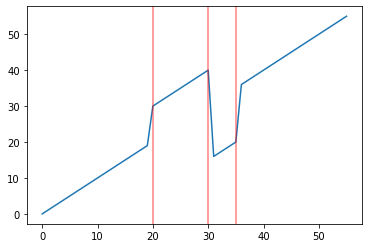

<Figure size 432x288 with 0 Axes>

In [174]:
def calculate_breakpoints(params, b_points_start = []):
    b_points = b_points_start.copy()
    for p in params[::-1]:
        new_points = [p[1], p[1] + p[2]]
        b_points = [b for b in b_points if not new_points[0] <= b <= new_points[1]]
        
        b_points.append(new_points[0])
        b_points.append(new_points[1])
    return b_points

### test the map
params = ((30, 20, 10), (10, 25, 10))
params2 = ((21, 46, 5), (39, 19, 7), (10, 3, 12))
params2 = ((35, 15, 10), (0,50, 2))

# breakpoints = []
# for par in params:
#     breakpoints.append(par[1])
#     breakpoints.append(par[1] + par[2])
breakpoints = calculate_breakpoints(params)
nums = []
for i in range(56):
    nums.append(map1(i, params))
    
import matplotlib.pyplot as plt
plt.plot(nums)
for point in breakpoints:
    plt.axvline(x = point, c = 'r', alpha = 0.5)
plt.show()
plt.clf()

In [212]:
def calculate_breakpoints_recursive(params1, params2):
    # Calculate initial breakpoints for both mappings
    b_points_params1 = calculate_breakpoints([params1])
    b_points_params2 = calculate_breakpoints([params2])

    # Transform breakpoints from params1 through map1 using params2
    transformed_breakpoints = []
    for bp in b_points_params1:
        transformed_bp = map1(bp, params2)
        transformed_breakpoints.append(transformed_bp)

    # Merge transformed breakpoints with b_points_params2
    # This step needs to handle duplicates and overlaps
    final_breakpoints = merge_breakpoints(b_points_params2, transformed_breakpoints)

    return final_breakpoints

def merge_breakpoints(list_1, list_2):
    return list(set(list_1 + list_2))

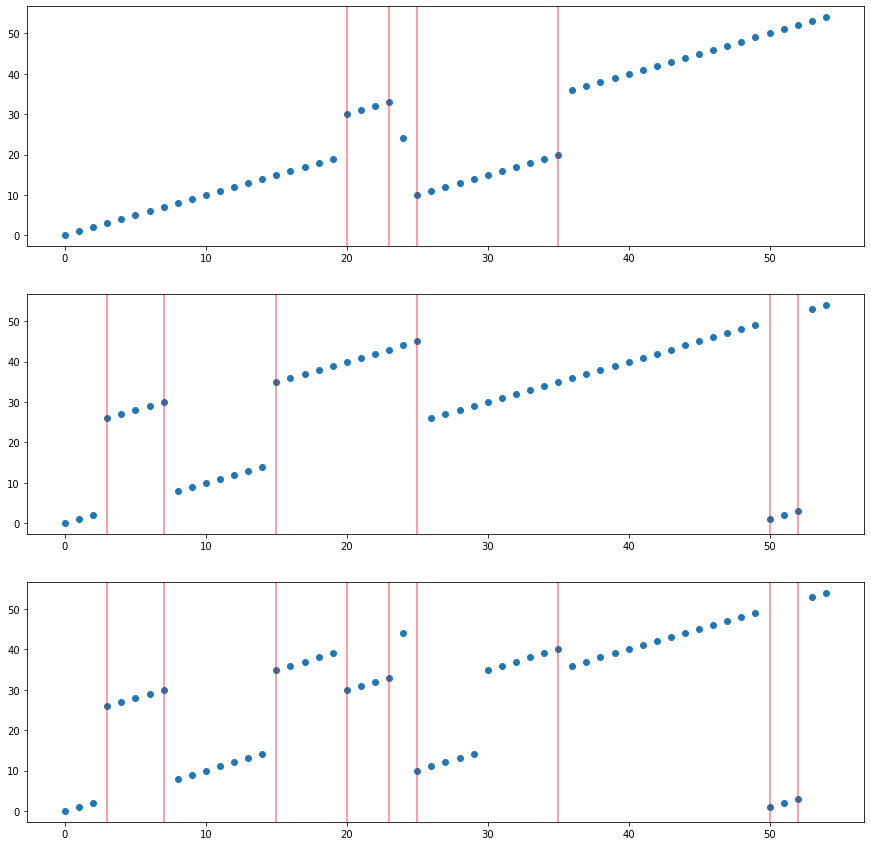

<Figure size 432x288 with 0 Axes>

In [260]:
params = ((30, 20, 3), (10, 25, 10))
params2 = ((35, 15, 10), (1,50, 2,), (26, 3, 4))
nums = []

def calculate_breakpoints(params_list, b_points_start = []):
    b_points = b_points_start.copy()
    for params in params_list[::-1]:
        for p in params[::-1]:
            new_points = [p[1], p[1] + p[2]]
            b_points = [b for b in b_points if not new_points[0] <= b <= new_points[1]]

            b_points.append(new_points[0])
            b_points.append(new_points[1])
    return b_points
# recurshywershy
plt.figure(figsize=(15, 15))
plt.subplot(311)
nums = []
b_points = calculate_breakpoints([params])
for i in range(55):
    nums.append(map1(i, params))
plt.plot(range(55), nums, ls = '', marker = 'o')
for point in b_points:
    plt.axvline(x = point, c = 'r', alpha = 0.5)

plt.subplot(312)
nums2 = []
b_points = calculate_breakpoints([params2])
for i in range(55):
    nums2.append(map1(i, params2))
plt.plot(range(55), nums2, ls = '', marker = 'o')
for point in b_points:
    plt.axvline(x = point, c = 'r', alpha = 0.5)
    
plt.subplot(313)
nums3 = []
b_points = calculate_breakpoints((params, params2))
for n in nums:
    nums3.append(map1(n, params2))
plt.plot(range(55), nums3, ls = '', marker = 'o')
for point in b_points:
    plt.axvline(x = point, c = 'r', alpha = 0.5)
plt.show()
plt.clf()

In [251]:
seed_pairs = np.array(list(zip(seeds[::2], seeds[1::2])))
print(seed_pairs)


[[ 919339981  562444630]
 [3366006921   67827214]
 [1496677366  101156779]
 [4140591657    5858311]
 [2566406753   71724353]
 [2721360939   35899538]
 [ 383860877  424668759]
 [3649554897  442182562]
 [2846055542   49953829]
 [2988140126  256306471]]


In [258]:
''' final workbench '''
real_b_points = calculate_breakpoints(list(data.values()))
first_pass_values = process(data, [n+1 for n in real_b_points])

trial = list(zip(real_b_points, first_pass_values))
sort_key = np.argsort(first_pass_values)

trial = np.array(trial)[sort_key]

trkr = []
for i in range(len(seed_pairs[:,0])):
    trkr.append(seed_pairs[i,0] - trial[0,0])
    
print(trkr)
closest_seed = seed_pairs[np.argmin(trkr), 0]
print(closest_seed)
#print([n+1 for n in real_b_points])
print(process(data, [closest_seed]))

[-2674943262, -228276322, -2097605877, 546308414, -1027876490, -872922304, -3210422366, 55271654, -748227701, -606143117]
383860877
[1102396173]


In [20]:
endpoints = []
seeds = [10000, 2000]
for seed in seeds:
    current_position = seed
    for key in data.keys():
        current_position = map1(current_position, data[key])
    endpoints.append(current_position)

In [241]:

print(first_pass_values)

[153579877, 3030071351, 19239306, 228989489, 3651901137, 1441792299, 3291286384, 4294967297, 2846239172, 3000122914, 4114367221, 1177743315, 2221380288, 3479313800, 3525294870, 2635022638, 516515676, 420047615, 2514776171, 3245160275, 2064729023, 4211725761, 1100038462, 1372076327, 1497804045, 3971867790, 986147854, 2008800915, 3152169595]


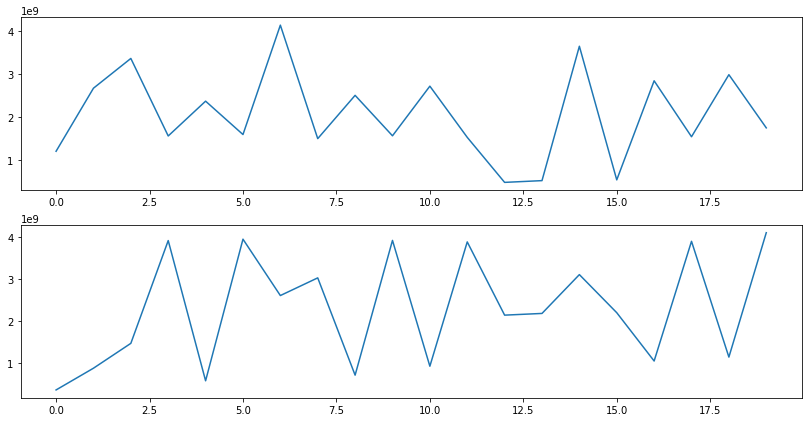

<Figure size 432x288 with 0 Axes>

In [129]:
''' visualize a single map (seed to soil)'''
test = data['seed-to-soil']
start = min([n for _, n, _ in test])
stop = max([n + e for _, n, e in test])

nums = []
nums2 = []

for i in seeds:
    nums.append(map1(i, data['seed-to-soil']))
for n in nums:
    nums2.append(map1(n, data['soil-to-fertilizer']))
    
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 7))
plt.subplot(211)
plt.plot(nums)

plt.subplot(212)
plt.plot(nums2)
plt.show()
plt.clf()

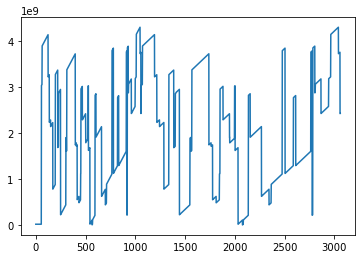

<Figure size 432x288 with 0 Axes>

In [66]:
nums2 = []
for n in nums:
    nums2.append(map1(n, data['soil-to-fertilizer']))
plt.plot(nums2)
plt.show()
plt.clf()   

In [86]:
test1 = [1, 2, 3, 4]
test1a = [False, False, True, False]
selected = [item for item, flag in zip(test1, test1a) if not flag]
print(selected)

[1, 2, 4]
